## Q1. Housing Price (SVM/SVC)

#### Load and Explore the Data

*   Think about standardizing the data.

*  How would you replace discrete attributes


In [661]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [662]:
data = pd.read_csv('https://raw.githubusercontent.com/gaurav639/ML_Plaksha_CSVs/main/lab3_data.csv')

In [663]:
data.shape

(94, 5)

In [664]:
data.head()

,area,land,year,price,bldtype
0,2607,1200,2010,825000.0,0
1,1950,1783,1899,1685000.0,0
2,2520,1875,1899,1100000.0,0
3,3750,3125,1931,1200000.0,1
4,7812,5021,1908,1900000.0,1


In [665]:
data.corr()

,area,land,year,price,bldtype
area,1.000000,0.588672,0.174522,0.127455,0.340248
land,0.588672,1.000000,0.202799,0.277138,0.479521
year,0.174522,0.202799,1.000000,0.012304,0.257514
price,0.127455,0.277138,0.012304,1.000000,0.013360
bldtype,0.340248,0.479521,0.257514,0.013360,1.000000


In [666]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   area     94 non-null     int64  
 1   land     94 non-null     int64  
 2   year     94 non-null     int64  
 3   price    94 non-null     float64
 4   bldtype  94 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 3.8 KB


In [667]:
data.corr()

,area,land,year,price,bldtype
area,1.000000,0.588672,0.174522,0.127455,0.340248
land,0.588672,1.000000,0.202799,0.277138,0.479521
year,0.174522,0.202799,1.000000,0.012304,0.257514
price,0.127455,0.277138,0.012304,1.000000,0.013360
bldtype,0.340248,0.479521,0.257514,0.013360,1.000000


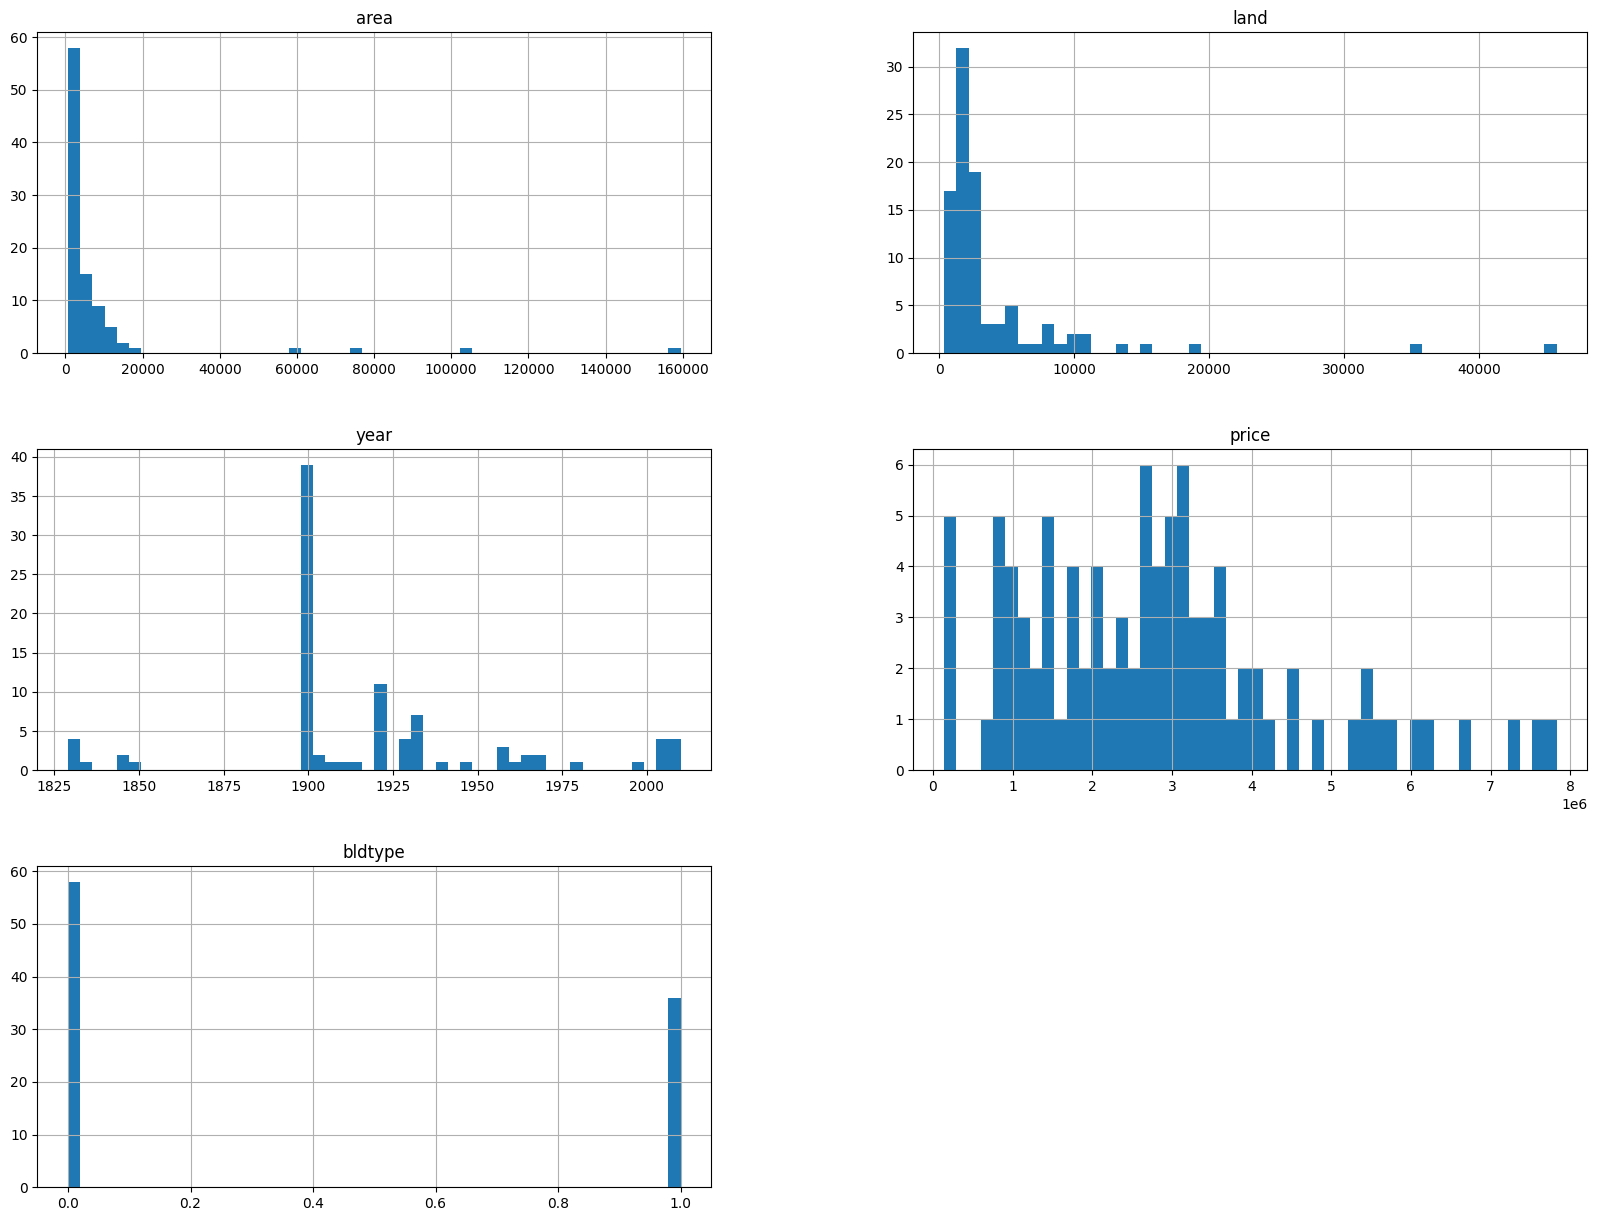

In [668]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [669]:
print(data['year'].value_counts())
print(data['year'].value_counts().count())

1899    21
1901    11
1920    11
1931     7
1900     7
1829     4
1930     4
2010     3
1956     3
1905     2
1967     2
2003     2
2005     2
1836     1
1979     1
1938     1
1962     1
1965     1
1844     1
1847     1
1999     1
1915     1
1948     1
1908     1
1910     1
1848     1
2009     1
1966     1
Name: year, dtype: int64
28


Since 'year' feature has discrete numerical values so we can't directly use it and doing one-hot encoding on a high cardinality feature like 'year' (having 28 categories) is also not good, since it will increase the dimensionality of the data due to which model might overfit.

So, I am converting 'year' feature into a manner which now signifies how old the house is compare to present year and now we can use it as a feature containing continuous numerical data.

In [670]:
data['year'] = data[['year']].apply(lambda x: 2022 - x, axis = 1)

In [671]:
data

,area,land,year,price,bldtype
0,2607,1200,12,825000.0,0
1,1950,1783,123,1685000.0,0
2,2520,1875,123,1100000.0,0
3,3750,3125,91,1200000.0,1
4,7812,5021,114,1900000.0,1
...,...,...,...,...,...
89,4500,4550,102,3725000.0,1
90,12164,45767,66,5567760.0,1
91,15707,15707,56,7830000.0,1
92,5203,4163,122,3294000.0,1


#### Train-Test Splot 80/20

In [672]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('bldtype', axis = 1), data['bldtype'], test_size=0.2, random_state = 42)

In [673]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

#### Train a linear model with soft margin



*   Try with initial value of C=1



In [674]:
from sklearn.svm import SVC
svc = SVC(C = 1)
svc.fit(X_train_std, y_train)
y_pred = svc.predict(X_test_std)

In [675]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In above problem, the accuracy without hyperparameter tuning is 100%. So, no use of doing it and it will not make any subsequent changes. Also, dropping any feature from input data is not decreasing the accuracy by a large scale.

#### Use cross validation to find best value of C



*   Can do it manually or use GridSearchCV

*   Divide the training set into train+validation



In [676]:
from sklearn.model_selection import GridSearchCV
parameter = {'C': [i/10 for i in range(1,101)]}
svc = SVC()
svc_cv = GridSearchCV(svc, parameter, cv=5, scoring='accuracy')

In [677]:
svc_cv.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                               1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0,
                               2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, ...]},
             scoring='accuracy')

In [678]:
svc_cv.best_params_

{'C': 1.6}

#### Analyse accuracy basis the new values you have computed

In [679]:
svc_cv.best_estimator_.fit(X_train_std, y_train)

SVC(C=1.6)

In [680]:
y_pred = svc_cv.predict(X_test_std)
accuracy_score(y_test, y_pred)

1.0

## Q2. DT and RF

Consider the Wisconsin Breast Cancer dataset available from
http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+
(Diagnostic)

The dataset has 32 attributes that predict malignancy. There are a
total of 569 data patterns. Use 5-fold cross-validation. 


1.   Use Keras or any other framework to construct a decision tree from the training data and obtain the performance on the test data

2.   Construct a random forest (of say, 100 trees) from the training data and use the random forest to obtain the performance on the test data

3. Compare the performance you obtain in 1 and 2


In [681]:
cancer_data = pd.read_csv('https://raw.githubusercontent.com/gaurav639/ML_Plaksha_CSVs/main/breast_cancer_data.csv')

In [682]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [683]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

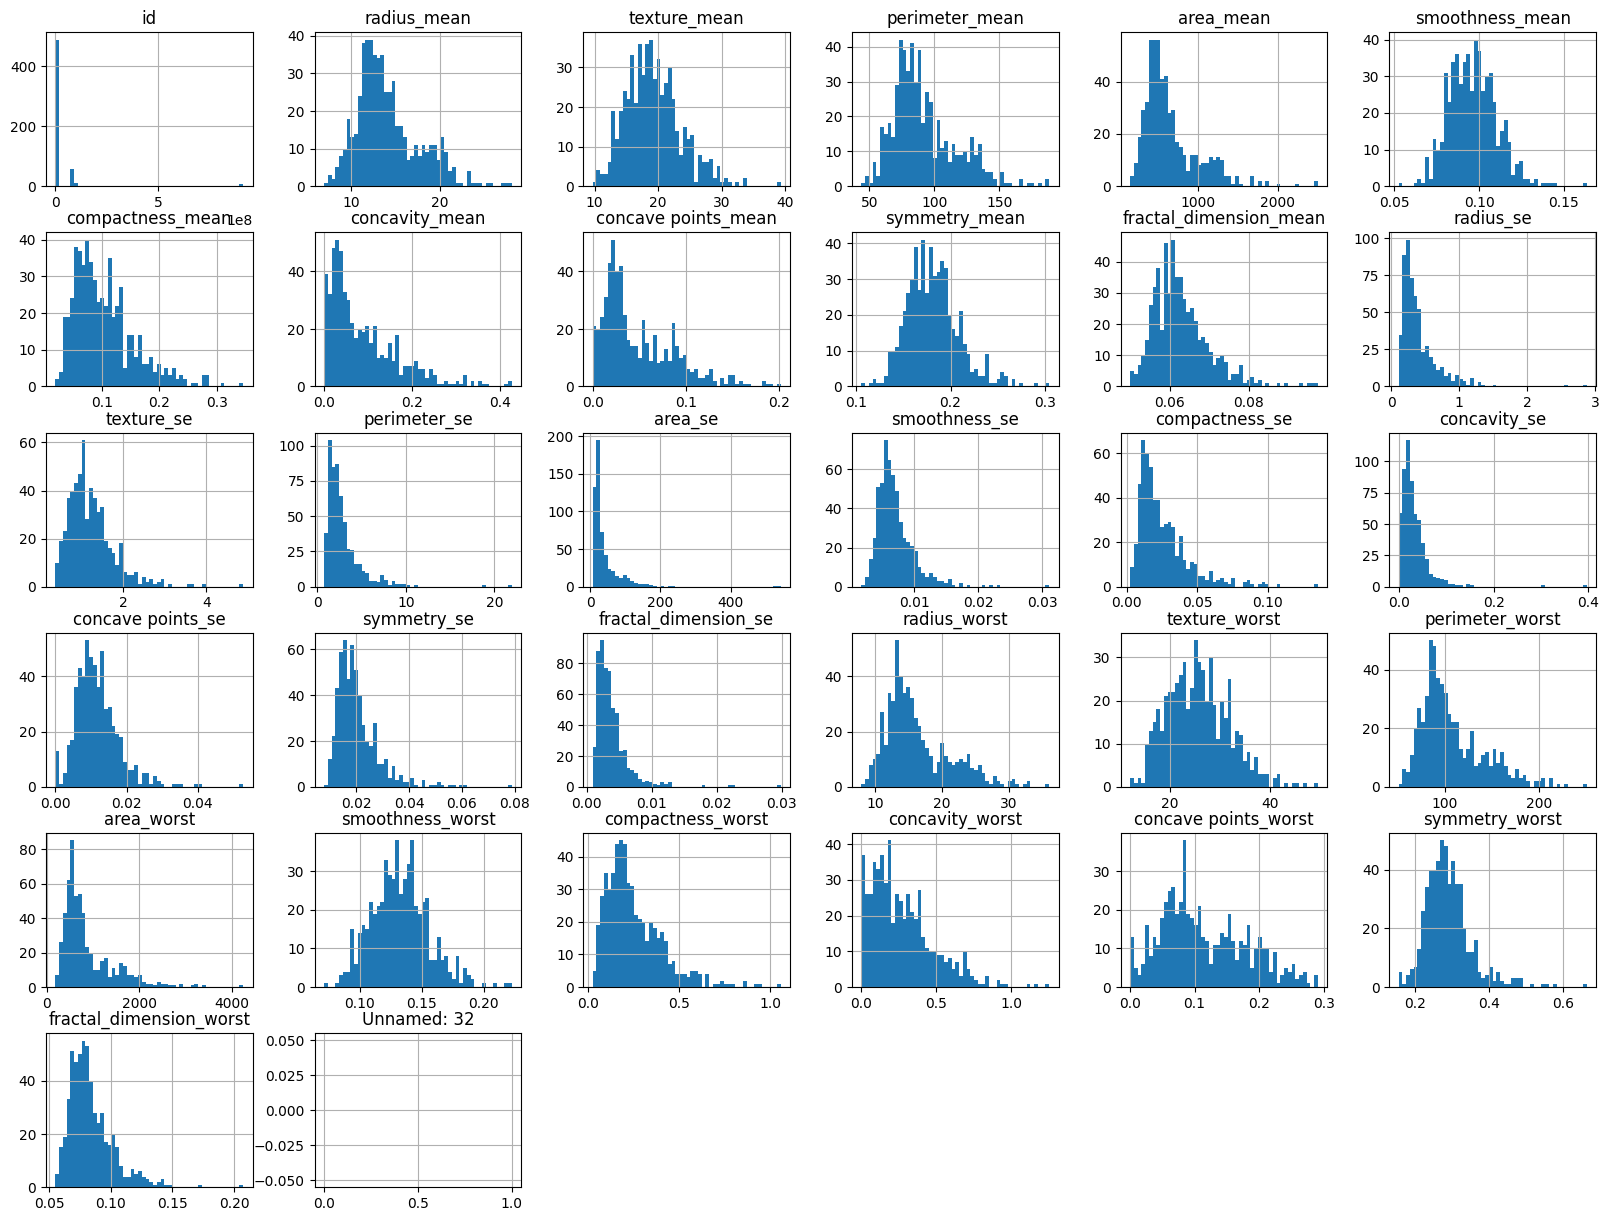

In [684]:
cancer_data.hist(bins=50, figsize=(20,15))
plt.show()

In [685]:
cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [686]:
X = cancer_data.drop(['diagnosis','Unnamed: 32'], axis = 1)
Y = cancer_data['diagnosis']
XC_train, XC_test, yc_train, yc_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [687]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Split the data into 5 folds
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the hyperparameter grid
param_grid = {'criterion' : ['gini', 'entropy', 'log_loss'],
              'max_depth': [4, 5, 6]}

# Initialize the grid search object
DT_cv = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=kfold)

# Fit the grid search object to the data
DT_cv.fit(XC_train, yc_train)

# Get the best hyperparameter values
DT_cv.best_params_

{'criterion': 'log_loss', 'max_depth': 5}

In [688]:
test_accuracy_DT = DT_cv.score(XC_test, yc_test)
print(test_accuracy_DT)

0.956140350877193


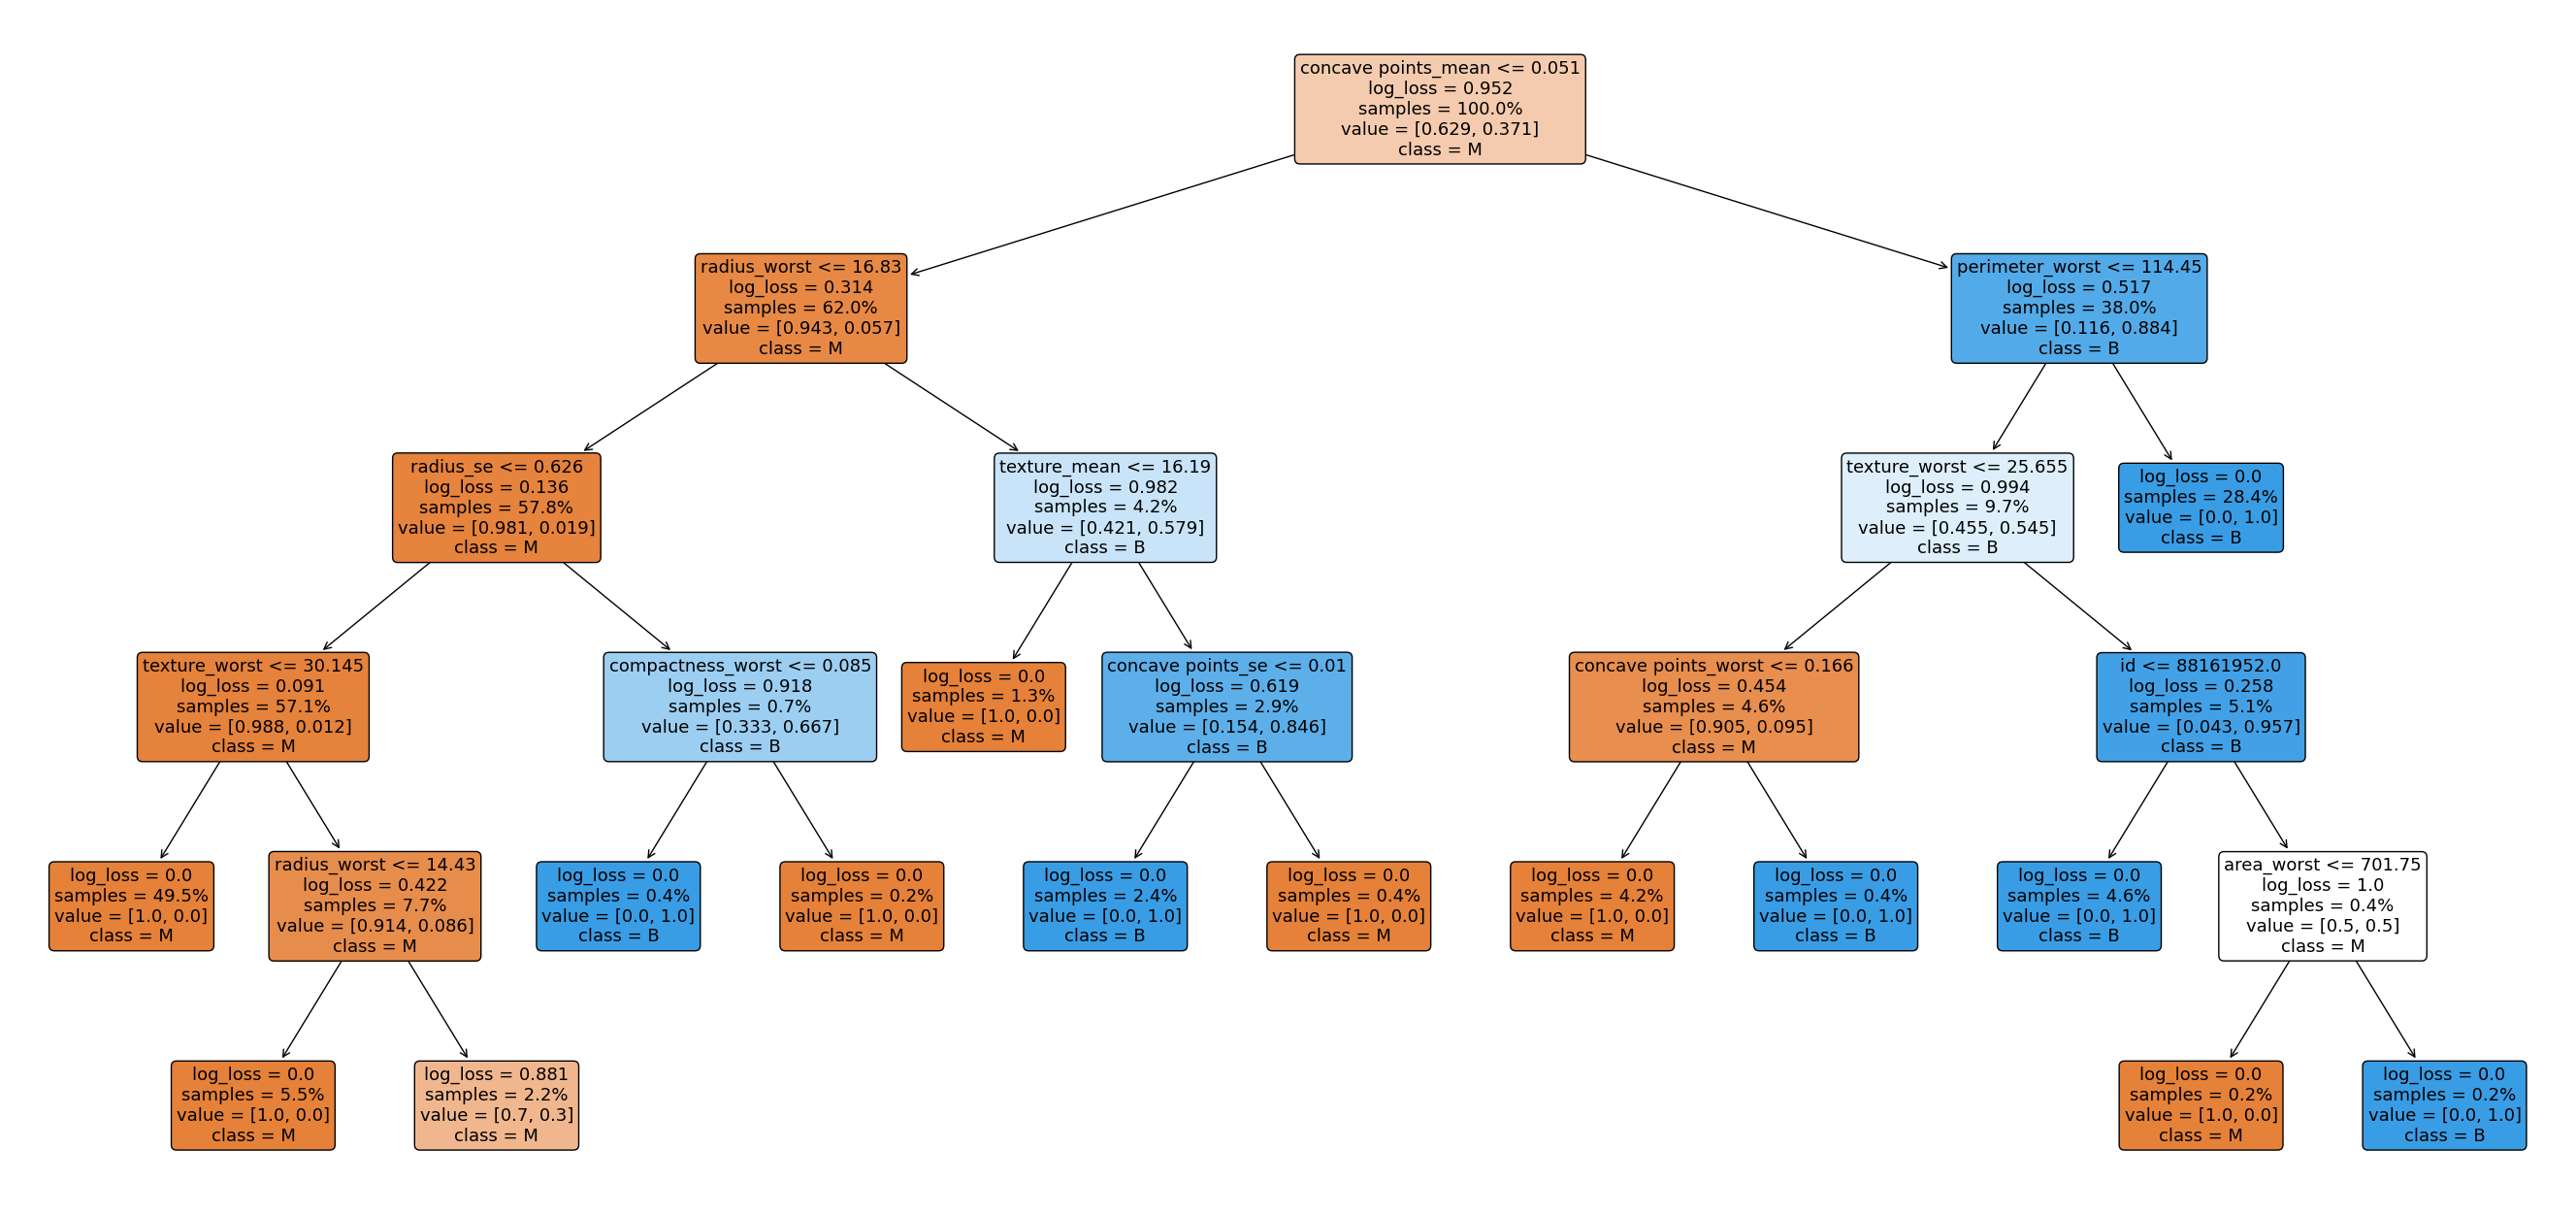

In [689]:
from sklearn.tree import plot_tree
features = X.columns
classes = Y.unique()
plt.figure(figsize=(34, 16))
plot_tree(DT_cv.best_estimator_,
          feature_names=features,
          class_names=classes,
          rounded=True, # Rounded node edges
          filled=True, # Adds color accoding to class
          proportion=True,
          fontsize=13); # Displays the proportions of class samples instead of the whole number of samples

In [690]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Split the data into 5 folds
kfold = KFold(n_splits=5, shuffle=True, random_state=123)

# Define the hyperparameter grid
param_grid = {'n_estimators': [100],
              'max_depth': [2, 3, 4, 5, 10]}

# Initialize the grid search object
RF_cv = GridSearchCV(RandomForestClassifier(), param_grid, cv=kfold)

# Fit the grid search object to the data
RF_cv.fit(XC_train, yc_train)

# Get the best hyperparameter values
RF_cv.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [691]:
test_accuracy_RF = RF_cv.score(XC_test, yc_test)
print(test_accuracy_RF)

0.9649122807017544


Score of decision tree classifier: 0.956

Score of random forest classifier: 0.964

Since score of random forest classifier (100 trees) is greater than that of decision tree classifier. So we can say that Random Forest will work better than decision trees for this datatset.

####  Repeat the exercise but add ±10% noise to 25% of the data (Optional)

### Boosting

Implement a boosting classifier algorithm for the same dataset as above (sample without noise)

Feel free to use any boosting algorithm you want

However only run the code for the eventual algorithm you choose and comment out every other algorithm

Briefly explain why you chose a particular algorithm

In [692]:
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier

# Define the base classifier
base_classifier = DecisionTreeClassifier(max_depth=1)

# Define the boosting model
model = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=100)

# Fit the model to the training data
model.fit(XC_train, yc_train)

# Evaluate the model on the test set
test_accuracy_ada = model.score(XC_test, yc_test)
print(test_accuracy_ada)


0.9736842105263158


In [693]:
# GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(max_depth=1)
model.fit(XC_train, yc_train)
test_accuracy = model.score(XC_test, yc_test)
print("Gradient Boosting Classifier accuracy ->", test_accuracy)

# XGBoost
ycx_test = yc_test.map({'M':1, 'B':0})
ycx_train = yc_train.map({'M':1, 'B':0})
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=1)
model.fit(XC_train, ycx_train)
test_accuracy = model.score(XC_test, ycx_test)
print("XGBoost Classifier accuracy ->", test_accuracy)

#accuracy of Adaboost
print("AdaBoost Classifier accuracy ->", test_accuracy_ada)


Gradient Boosting Classifier accuracy -> 0.956140350877193
XGBoost Classifier accuracy -> 0.9649122807017544
AdaBoost Classifier accuracy -> 0.9736842105263158


Here Ada Boosting gives best accuracy among other boosting algorithms and I will go with that because of following reasons:
1. The problem is of binary classification where Ada Boost performs really well.

2. Here, improvements in the accuracy among different boosting algorithms depends upon how these algos correctly identify the worst **off** data points(since all models are having high accuracy). Due to Adaboost's nature of weighing those problematic points higher, it wins over other boosting algos. 

### Bagging

Implement a bagging classifier on the RF you created above


> from sklearn.ensemble import BaggingClassifier

You will have to pass the DT into the Bagging Classifier

Once you have the y_pred for Bagging and RF, accurately compute the accuracy by computing the numpy sum where pred(bagging) == pred(RF) and divide by len(pred(bagging))

Please provide rationale behind why this is done.



In [694]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(max_depth=8), 
    n_estimators=100
)
bag_model.fit(XC_train, yc_train)
print(bag_model.score(XC_test,yc_test))

0.956140350877193


In [695]:
df = pd.DataFrame()
df['Model'] = ['Decision Tree', 'Bagging', 'Random Forest']
df['accuracy'] = [DT_cv.score(XC_test,yc_test)*100 , bag_model.score(XC_test,yc_test)*100,RF_cv.score(XC_test,yc_test)*100]
print(df)

           Model   accuracy
0  Decision Tree  95.614035
1        Bagging  95.614035
2  Random Forest  96.491228


1. Bagging done on a decision tree with same hyperparameters works similar to random forest thats why the predictions from bagging and random forest are almost the same. The above line is true because, RF is just fitting multiple DTs on subsamples, while bagging is just taking our existing DTs and using it on many subsamples.

2. Bagging is a more general ensemble method than random forest but random forest has more tunable parameters and much more specific.

Bonus : While you are looking at ensemble models, explore VotingClassifier

A voting classifier is an ensemble method that combines the predictions of multiple base models and makes a final prediction based on the majority vote or an average of their predictions.

In [696]:
from sklearn.ensemble import VotingClassifier

# Create three decision tree base models with different hyperparameter values
dt1 = DecisionTreeClassifier(max_depth=4, random_state=123)
dt2 = DecisionTreeClassifier(max_depth=6, random_state=123)
dt3 = DecisionTreeClassifier(max_depth=8, random_state=123)

# Create a voting classifier that combines the predictions of the three decision tree base models
vc = VotingClassifier(estimators=[('dt1', dt1), ('dt2', dt2), ('dt3', dt3)], voting='hard')

# Fit the voting classifier to train data
vc.fit(XC_train, yc_train)

# Make predictions on test data
predictions = vc.predict(XC_test)


In [697]:
print(vc.score(XC_test, yc_test))

0.9385964912280702


We can give different hyperparameter values to see the change in accuracy.